# VGG16

In [9]:
from torch import optim
from src.training import Training
from src.evaluation import Evaluation
from models.vgg.vgg16 import VGG16

## Model

In [10]:
# declare model details
model_params = {
    'img_size': 32,
    'img_channel': 1,
    'n_classes': 10
}
model_ptt = VGG16

## Optimizer

In [11]:
# declare optimizer details
optimizer_params = {
    'lr': 1e-2
}
optimizer_ptt = optim.AdamW

In [3]:
# declare optimizer details
optimizer_params = {
    'lr': 1e-2,
    'momentum': 0.5
}
optimizer_ptt = optim.SGD

## Scheduler

In [5]:
# declare scheduler details
sheduler_params = {
    'step_size': 10,
    'gamma': 0.1
}
scheduler_ptt = optim.lr_scheduler.StepLR

In [12]:
scheduler_params = None
scheduler_ptt = None

## Training

In [13]:
# initialize learning process
data_dir = r'data/final'
train_ratio = 0.9
interpolate = 32
ckpt_dir = r'checkpoints/vgg/vgg16'
from_ckpt = False

training = Training(data_dir=data_dir, train_ratio=train_ratio, 
                    interpolate=interpolate, ckpt_dir=ckpt_dir, from_ckpt=from_ckpt,
                    model_ptt=model_ptt, model_params=model_params,
                    optimizer_ptt=optimizer_ptt, optimizer_params=optimizer_params,
                    scheduler_ptt=scheduler_ptt, scheduler_params=scheduler_params)
training.model.get_summary()

In [14]:
# start learning
epochs = 200
save_every = 10
batch_sizes = [128, 256]
train_history = training.train(epochs=epochs, save_every=save_every,
                               batch_sizes=batch_sizes)

Epochs:  14%|█▍        | 29/200 [28:43<2:47:21, 58.72s/epoch]

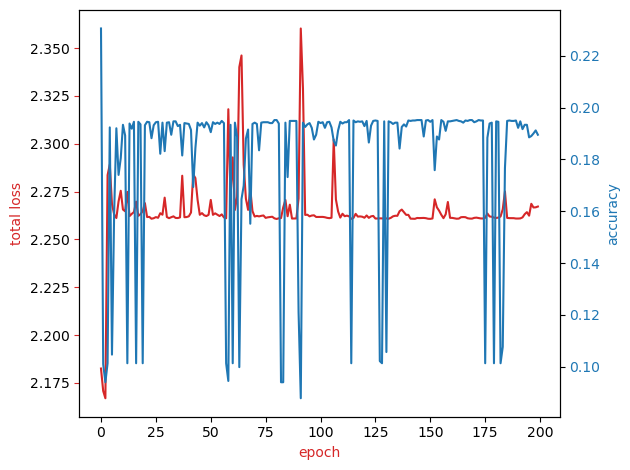

In [ ]:
# plot training loss and validation accuracy
training.plot_results()

## Evaluation

Accuray: 0.1923
f1-score: 0.06829803652330566


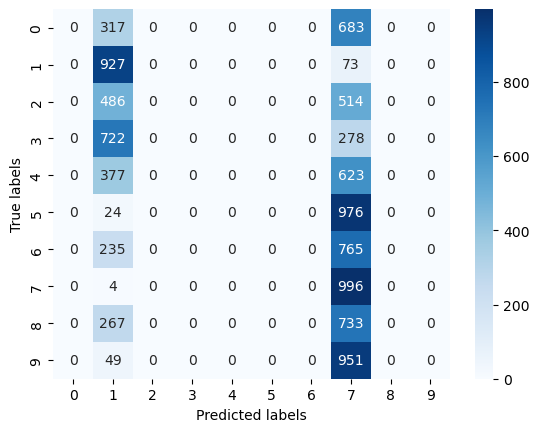

In [ ]:
# evaluate model through accuracy, f1-score and confusion matrix
model = training.model
evaluation = Evaluation(data_dir=data_dir, interpolate=interpolate, model=model)
evaluation.evaluate()
evaluation.plot_results()